**EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering**

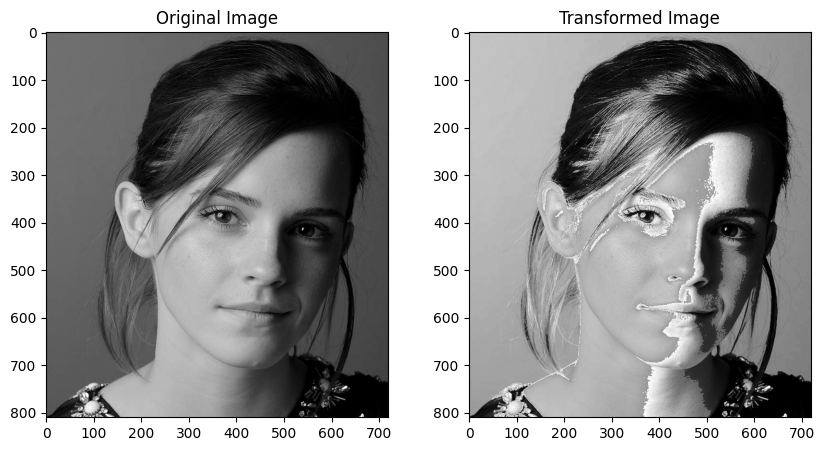

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to apply intensity transformation to a single pixel
def transform_pixel_intensity(pixel_val: int) -> float:
    if 50 <= pixel_val <= 150:
        return 1.55*pixel_val + 22.5
    else:
        return pixel_val

# Function to apply intensity transformation to the entire image
def apply_intensity_transformation(image: np.ndarray) -> np.ndarray:
    transformed_img = np.zeros(image.shape, dtype=np.uint8)
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            pixel_intensity = image[row][col]
            transformed_img[row][col] = transform_pixel_intensity(pixel_intensity)

    return np.array(transformed_img, dtype=np.uint8)


# Load grayscale image
input_image = cv2.imread("a1images/emma.jpg", cv2.IMREAD_GRAYSCALE)

# Apply the intensity transformation to the image
output_image = apply_intensity_transformation(input_image)


# Display both the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(input_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Transformed Image")
plt.imshow(output_image, cmap='gray')

plt.show()


2. brain proton density image

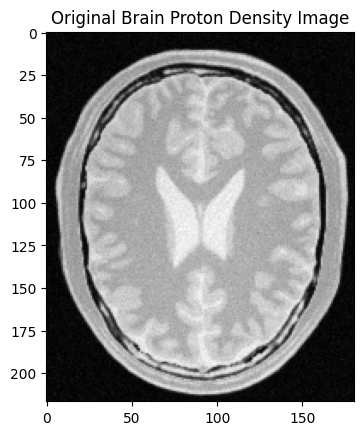

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the brain proton density image
brain_proton_density_img = cv2.imread("a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(brain_proton_density_img, cmap='gray')
plt.title("Original Brain Proton Density Image")
plt.show()